# Fast Fourier Transform

## 12.01 Discrete Fourier Transform

Represent a continous function as linear combination of sines and cosines.
* The sine and cosine components are referred to as **frequencies**.
* For some problems, frequency domain is more efficient than time or space domain.

**Euler's formula**

aka **complex exponential**
$$
e^{i \theta} = \cos \theta + i \sin \theta
$$
where
* $i = \sqrt{-1}$ is complex

**Roots of Unity**

aka **twiddle factors**

For a given integer $n$ the primitive nth root of unity is given by:
$$
\omega_n = \cos(2\pi/n) - i \sin(2\pi/n) = e^{-2\pi i/n}
$$

##### Example: $w_4^k$ 
$k = [0, 1, 2, 3]$ represents $\pi/2$ steps counterclockwise around the real-complex plane.
* $w_4^0 = 1$
* $w_4^1 = -i$
* $w_4^2 = -1$
* $w_4^3 = i$

#### Discrete Fourier Transform (DFT)
DFT $y$ of the sequence $x = [x_0, \cdots, x_{n-1}]^T$ is given by:
$$
y_m = \sum_{k=0}^{n-1} {x_k \omega_n^{mk}}, \qquad m = 0, \cdots, n-1
$$
where
* $\omega_n^{mk}$ is the kth element of the nth-root of unity

Expressed in matrix notation:
$$
y = F_n x
$$
where
* $F_n$ is the Fourier matrix with entries $F_n = \omega_n^{mk}$.

#### Inverse DFT
Inverse DFT $x$ of the sequence $y = [y_0, \cdots, y_{n-1}]^T$ is given by:
$$
x_k = \frac{1}{n} \sum_{m=0}^{n-1} {y_m \omega_n^{-mk}}, \qquad k = 0, \cdots, n-1
$$

Expressed in matrix notation:
$$
x = F_n^{-1} y
$$
where
* $F_n^{-1} = (1/n) F_n^H$ is the inverse of the Fourier matrix
  * $F_n^H$ is the conjugate transpose of $F_n$
    * Note: $F_n$ is almost but **not** Hermitian


#### Significance
DFT gives a trigonometric interpolant using only matrix-vector multiplication with $O(n^2)$ work.

DFT of purely real sequence is in general complex.

$y_0 = \sum_{k=0}^{n-1} x_k$ is called zero frequency or **DC** component

$y_{n/2}$ is highest frequency representable aka **Nyquist frequency**

Demonstrate computing the roots of unity for $n = 2, 4, 8$.

In [1]:
import numpy as np

def roots_unity(n):
    """
    Return the nth roots of unity $e^{(-2k \pi i)/n}$.
    """
    k = np.arange(0, n, dtype='d')
    return np.exp((-2.*k*np.pi*1j)/n)


omega2 = roots_unity(2)
print("omega2:\n", omega2)
np.testing.assert_almost_equal(omega2, np.array([1, -1]))

omega4 = roots_unity(4)
print("omega4:\n", omega4)
np.testing.assert_almost_equal(omega4, np.array([1, -1j, -1, 1j]))

omega8 = roots_unity(8)
# Compare to $\omega_n = \cos(2\pi/n) - i \sin(2\pi/n)$.
np.testing.assert_almost_equal(omega8, np.array(
    [1, 
     np.cos(1.*np.pi/4.) - 1j*np.sin(1.*np.pi/4.),  # 45d
     -1j,
     np.cos(3.*np.pi/4.) - 1j*np.sin(3.*np.pi/4.),  # 135d
     -1,
     np.cos(5.*np.pi/4.) - 1j*np.sin(5.*np.pi/4.),  # 225d
     1j,
     np.cos(7.*np.pi/4.) - 1j*np.sin(7.*np.pi/4.)]))  # 315d

omega2:
 [ 1.+0.0000000e+00j -1.-1.2246468e-16j]
omega4:
 [ 1.0000000e+00+0.0000000e+00j  6.1232340e-17-1.0000000e+00j
 -1.0000000e+00-1.2246468e-16j -1.8369702e-16+1.0000000e+00j]


Demonstrate computing the Fourier matrix for nth roots of unity.

In [2]:
import numpy as np

def fourier_matrix(n):
    """
    Return the Fourier matrix for nth roots of unity $F_n$.
    """
    # Compute the nth roots of unity.
    omega = np.exp((-2.*np.pi*1j)/n)
    # Entries of Fourier matrix given by a_{ij} = \omega^{i*j}.
    i, j = np.meshgrid(np.arange(n), np.arange(n), indexing='ij')
    return np.power(omega, i*j)


F4 = fourier_matrix(4)
np.testing.assert_almost_equal(F4, np.array([[1, 1, 1, 1],
                                             [1, -1j, -1, 1j],
                                             [1, -1, 1, -1],
                                             [1, 1j, -1, -1j]]))

Compute the DFT for the sequence $x = [4,0,3,6,2,9,6,5]$ from the Fourier matrix with $n=8$ and verify that the inverse DFT returns the same sequence. 

In [3]:
import numpy as np

n = 8  # 8th roots of unity.

# Compute DFT as y = F_n x.
F8 = fourier_matrix(n)
x = np.array([4,0,3,6,2,9,6,5], dtype=np.float64)
y = np.matmul(F8, x)

print("y:\n", y)
np.testing.assert_almost_equal(y, np.array(
    [35, 
     -5.07+8.66j, 
     -3+2j, 
     9.07+2.66j, 
     -5, 
     9.07-2.66j, 
     -3-2j, 
     -5.07-8.66j]), decimal=2)

# Confirm that DC component equals the sum of the sequence.
np.testing.assert_equal(y[0], np.sum(x))

# Compute the inverse F_n^{-1} from complex conjugate transpose.
F8inv = (1./n)*F8.conj().T

# Verify the inverse DFT is $F_n^{-1} y = x$.
xx = np.matmul(F8inv, y)
np.testing.assert_almost_equal(xx, x)

y:
 [35.        +0.00000000e+00j -5.07106781+8.65685425e+00j
 -3.        +2.00000000e+00j  9.07106781+2.65685425e+00j
 -5.        -2.13162821e-14j  9.07106781-2.65685425e+00j
 -3.        -2.00000000e+00j -5.07106781-8.65685425e+00j]


## 12.02 Fast Fourier Transform

FFT uses symmetry and redundancy to compute the DFT more efficiently.
* DFT of n-point sequence can be computed via 2 DFT of $n/2$ (half) length.

A pattern emerges from the Fourier matrices.
* The matrix $F_4$ is composed of diagonally scaled blocks of $F_2$.
* The permutation matrix $P_n$ is used to rearrange the matrix so that even numbered columns appear before the odd numbered columns.
$$
F_1 = 1, \qquad
F_2 = 
\begin{bmatrix}
1 & 1 \\
1 & -1 \\
\end{bmatrix}, \qquad
F_4 = 
\begin{bmatrix}
1 & 1 & 1 & 1 \\
1 & -i & -1 & i \\
1 & -1 & 1 & -1 \\
1 & i & -1 & -i
\end{bmatrix}
$$

#### FFT
Recursive divide-and-conquer algorithm for computing DFT.
* Work required $O(n \log_2 n)$.
  * Compare to $O(n^2)$ for matrix-vector product form of DFT.
* Can be implemented in-place and using no additional storage.
  * Ignore implementation below.
* FFT can be reworked to compute inverse DFT.

Assumptions of Input Sequence
1. Equally spaced.
2. Periodic.
  * Transforming non-periodic sequence may introduce spurious noise.
3. Power of 2 in length.
  * Padding a sequence may introduce spurious noise.
  * **Mixed-radix FFT** is a work-around for this.

Compute the FFT of the sequence $x = [4,0,3,6,2,9,6,5]$.

In [4]:
import numpy as np

def fft(x, n, omega):
    """
    Compute the DFT of the sequence x using the FFT.
    
    x is the input sequence.
    n is the number of points in the sequence, must be 2^n.
    omega are the nth roots of unity.
    
    Returns y as the result of applying the DFT to x.
    """
    if n == 1:  # Base case.
        return np.array([x[0]])
    halfn = n//2
    # Split x into odd and even sequences.
    odd, even = np.zeros(halfn), np.zeros(halfn)
    for k in range(halfn):
        odd[k], even[k] = x[2*k+1], x[2*k]
    # Recursively compute DFT of each sequence.
    yodd = fft(odd, halfn, omega*omega)
    yeven = fft(even, halfn, omega*omega)
    # Combine results.
    y = np.zeros(n, dtype=np.complex)
    for k in range(n):
        y[k] = omega[k]*yodd[k%halfn] + yeven[k%halfn]
    return y


# Initialize the input sequence and compute FFT.
x = np.array([4,0,3,6,2,9,6,5], dtype=np.float64)
n = x.size
omega = roots_unity(n)
y = fft(x, n, omega)

# Compare the result of FFT with numpy.fft.fft.
expected = np.fft.fft(x, n)
np.testing.assert_almost_equal(y, expected)

## 12.03 Applications of DFT

#### Digital Filtering
Remove High Frequency Noise
1. Compute DFT of the sequence.
2. Set high-frequency components of the transformed sequence to zero.
3. Compute the inverse DFT of the sequence to transform data back to time domain.

Similar applications include separating overlapping cyclic phenomena such as:
* diurnal vs. seasonal signal in weather data
* daily vs. secular trend in economic data

#### Discrete Convolution
1. Transform the input sequence and kernel to frequency domain using DFT.
  * Zero-pad the kernel to be of the same size as the input sequence.
2. Compute the pointwise product of the two sequences in frequency domain.
3. Transform the product back to the time domain using inverse FFT.

Demonstrate use of FFT to remove Gaussian noise from a DC signal with $c = 5$. 

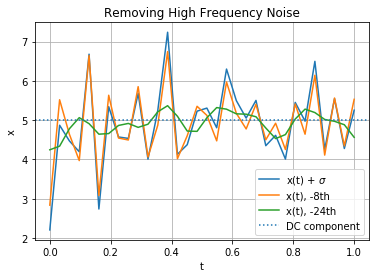

In [5]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Create a dc sequence with added Gaussian noise.
n, c = 32, 5.
x = c + np.random.standard_normal(n)

# Setup the k highest frequency components to remove.
kths = [8, 24]

# Store the inverse DFT associated with each k.
xks = []

for k in kths:

    # Transform the sequence to frequency domain.
    xfreq = np.fft.fft(x, n)

    # Remove the kth high frequency components.
    xfreq[-k:] = 0.
    
    # Transform the data back to the time domain.
    xinv = np.fft.ifft(xfreq, n)
    xks.append(xinv)

# Plot approximate solution.
t = np.linspace(0, 1, n)
plt.plot(t, x, label='x(t) + $\sigma$')
for (k, xk) in zip(kths, xks):
    plt.plot(t, xk.real, ls='-', label='x(t), -{0}th'.format(k))
plt.axhline(c, linestyle=':', label='DC component')
plt.title("Removing High Frequency Noise")
plt.ylabel('x')
plt.xlabel('t')
plt.grid()
plt.legend()
plt.show()

Demonstrate use of FFT to perform 1D convolution of a random signal with a 4-point kernel $[1, 2, 2, 1]$.

In [6]:
import numpy as np

nx1, nx2 = 32, 4
x1, x2 = np.random.random(nx1), np.array([1,2,2,1], dtype=np.float64)

# Zero pad the window to equal size of x1.
x2pad = np.hstack((x2, np.zeros(nx1-nx2)))

# Compute the DFT of the input sequences.
x1fft, x2fft = np.fft.fft(x1, nx1), np.fft.fft(x2pad, nx1)

# Compute the pointwise product in frequency domain.
x1x2freq = x1fft * x2fft

# Transform back to time domain.
x1x2 = np.fft.ifft(x1x2freq, nx1)

# Compute convolution only where signals overlap eg mode='valid'.
expected = np.convolve(x1, x2, mode='valid')

# Compare only the overlapping part of the sigals.
np.testing.assert_almost_equal(x1x2[nx2-1:], expected)

## 12.04 Wavelets

Wavelet basis functions are improvement over sine and cosine for representing functions that change abruptly (eg sharp corners).

**Mother Wavelet** (def.) Single function $\phi(x)$ generated by dilation and translation, i.e., $\phi((x-b)/a)$, where a and b are real numbers with $a \neq 0$.

Sparse Wavelet Basis 
* Wavelets are localized in frequency (by dilation) and time (by translation).
* Fourier basis are localized in frequency but not time.

#### Discrete Wavelet Transform
* Analogous to the FFT.
* Computed by pyramidal, hierarchical algorithm.
* DWT requires $O(n)$ work compared to $O(n \log n)$ for FFT.
  * Sparsity of wavelet basis functions make it faster than FFT.

## Summary: Fast Fourier Transform

* Sines and cosines are appropriate for representing cyclic phenomena.
* DFT transforms input sequence to linear combination of sines and cosines.
* FFT performs DFT in $O(n \log n)$ work, provided input $n$ is power of 2.
  * Compare to $O(n^2)$ for matrix-vector product form of DFT.
* Wavelets are more effective for rapidly changing functions than DFT.
* Discrete Wavelet Transform aka DWT requires $O(n)$ work.